In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('precision', 1)

folder = './032018_48hrs/'

path_cyt = folder + 'Cytoplasm_Cancer_032018.xlsx'

markers = ['Cell ID', 
           'Nucleus (Cycle 1 - DAPI)',
           'BT474-H2BeGFP (Cycle 1 - FITC)', 
           'MCL1 (Cycle 2 - Cy3)', 
           'p-p65NFkB (Cycle 2 - Cy5)', 
           'p-Akt (Cycle 3 - FITC)',
           'aSMA (Cycle 3 - Cy3)',
           'p-gH2AX (Cycle 3 - Cy5)',
           'GRP78 (Cycle 4 - FITC)',
           'Vimentin (Cycle 4 - Cy3)']

tabs = ['BT474,Cntrl(rb,c2-4)', 
        'BT474,30nM(rb,c5-7)',
        'BT474,300nM(rb,c8-10)',
        
        'BT474+C3H-scr,Cntrl(rc,c2-4)',
        'BT474+C3H-scr,30nM(rc,c5-7)',
        'BT474+C3H-scr,300nM(rc,c8-10)',
        
        'BT474+C3H-1,Cntrl(rd,c2-4)',
        'BT474+C3H-1,30nM(rd,c5-7)',
        'BT474+C3H-1,300nM(rd,c8-10)',
        
        'BT474+C3H-3,Cntrl(re,c2-4)',
        'BT474+C3H-3,30nM(re,c5-7)',
        'BT474+C3H-3,300nM(re,c8-10)']

def concat_df(path):
    dt = []
    for t in tabs:
        dt.append(pd.read_excel(open(path, 'rb'), sheet_name=t, names=markers))
    df = pd.concat(dt, ignore_index=True)
    return df

In [2]:
df_cyt = concat_df(path_cyt)
df_cyt['Group'] = df_cyt['Cell ID'].apply(lambda x: ((x // 10**9) % 10 - 1) // 3)
print('*** Cytoplasm Dataset:')
df_cyt

*** Cytoplasm Dataset:


,Cell ID,Nucleus (Cycle 1 - DAPI),BT474-H2BeGFP (Cycle 1 - FITC),MCL1 (Cycle 2 - Cy3),p-p65NFkB (Cycle 2 - Cy5),p-Akt (Cycle 3 - FITC),aSMA (Cycle 3 - Cy3),p-gH2AX (Cycle 3 - Cy5),GRP78 (Cycle 4 - FITC),Vimentin (Cycle 4 - Cy3),Group
0,11100020013,1.4e+06,311103.3,101851.6,43709.0,73056.7,30051.5,6120.7,16078.1,12079.2,0
1,11100030022,1.9e+06,162176.2,183881.8,104492.1,206216.4,67026.0,23716.0,23564.9,31449.9,0
2,11100040016,1.3e+06,538824.0,84439.7,45970.9,70549.5,30217.9,1426.4,20359.0,16116.3,0
3,11100050019,1.3e+06,217196.1,58911.0,26316.6,27367.7,29239.0,2993.7,17980.0,21591.7,0
4,11100060017,6.8e+05,55856.2,80966.3,32906.0,21788.7,23781.4,1625.9,7795.0,15434.6,0
...,...,...,...,...,...,...,...,...,...,...,...
343663,49911711034,2.2e+05,16640.2,44580.2,4733.4,27072.3,15436.3,8104.0,7305.9,17668.4,2
343664,49911721034,2.5e+05,96468.8,40339.2,16100.2,26939.8,24199.1,10418.5,12620.9,15018.5,2
343665,49911731035,2.9e+05,162932.7,30150.8,46467.5,29489.4,16019.5,9917.5,12035.9,19004.7,2
343666,49911741036,2.3e+05,13803.6,35212.8,7303.4,17433.2,14706.9,2545.4,6376.2,16880.5,2


In [3]:
# All columns in the Cytoplasm dataset's information
df_cyt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343668 entries, 0 to 343667
Data columns (total 11 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Cell ID                         343668 non-null  int64  
 1   Nucleus (Cycle 1 - DAPI)        343668 non-null  float64
 2   BT474-H2BeGFP (Cycle 1 - FITC)  343668 non-null  float64
 3   MCL1 (Cycle 2 - Cy3)            343668 non-null  float64
 4   p-p65NFkB (Cycle 2 - Cy5)       343668 non-null  float64
 5   p-Akt (Cycle 3 - FITC)          343668 non-null  float64
 6   aSMA (Cycle 3 - Cy3)            343668 non-null  float64
 7   p-gH2AX (Cycle 3 - Cy5)         343668 non-null  float64
 8   GRP78 (Cycle 4 - FITC)          343668 non-null  float64
 9   Vimentin (Cycle 4 - Cy3)        343668 non-null  float64
 10  Group                           343668 non-null  int64  
dtypes: float64(9), int64(2)
memory usage: 28.8 MB


In [4]:
# Check if duplicate ID exists in Cytoplasm dataset
df_cyt['Cell ID'].value_counts()

34402740219    1
47805560560    1
27408570854    1
27507130853    1
41304830435    1
              ..
37710570681    1
27903960382    1
29902720323    1
32902180167    1
48907010612    1
Name: Cell ID, Length: 343668, dtype: int64

In [5]:
# Check the correctness of groups
df_cyt['Group'].value_counts()

0    118161
1    113238
2    112269
Name: Group, dtype: int64

In [6]:
# Cytoplasm markers' statistics
df_cyt[df_cyt.columns[1:-1]].describe()

,Nucleus (Cycle 1 - DAPI),BT474-H2BeGFP (Cycle 1 - FITC),MCL1 (Cycle 2 - Cy3),p-p65NFkB (Cycle 2 - Cy5),p-Akt (Cycle 3 - FITC),aSMA (Cycle 3 - Cy3),p-gH2AX (Cycle 3 - Cy5),GRP78 (Cycle 4 - FITC),Vimentin (Cycle 4 - Cy3)
count,3.4e+05,3.4e+05,3.4e+05,3.4e+05,3.4e+05,3.4e+05,3.4e+05,3.4e+05,3.4e+05
mean,5.4e+05,5.3e+04,8.6e+04,3.7e+04,4.0e+04,4.0e+04,9.2e+03,1.9e+04,3.3e+04
std,3.7e+05,9.9e+04,7.4e+04,5.8e+04,3.5e+04,6.2e+04,1.6e+04,2.7e+04,5.9e+04
min,3.9e+04,1.3e+03,0.0e+00,7.6e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00
25%,3.1e+05,1.4e+04,4.5e+04,1.1e+04,2.0e+04,1.9e+04,3.6e+03,1.2e+04,2.0e+04
50%,4.4e+05,2.1e+04,6.6e+04,1.9e+04,2.9e+04,2.7e+04,5.9e+03,1.6e+04,2.6e+04
75%,6.4e+05,4.1e+04,1.0e+05,4.0e+04,4.7e+04,4.2e+04,1.1e+04,2.3e+04,3.7e+04
max,1.3e+07,2.7e+06,8.8e+06,4.7e+06,3.6e+06,5.5e+06,1.2e+06,4.2e+06,8.8e+06


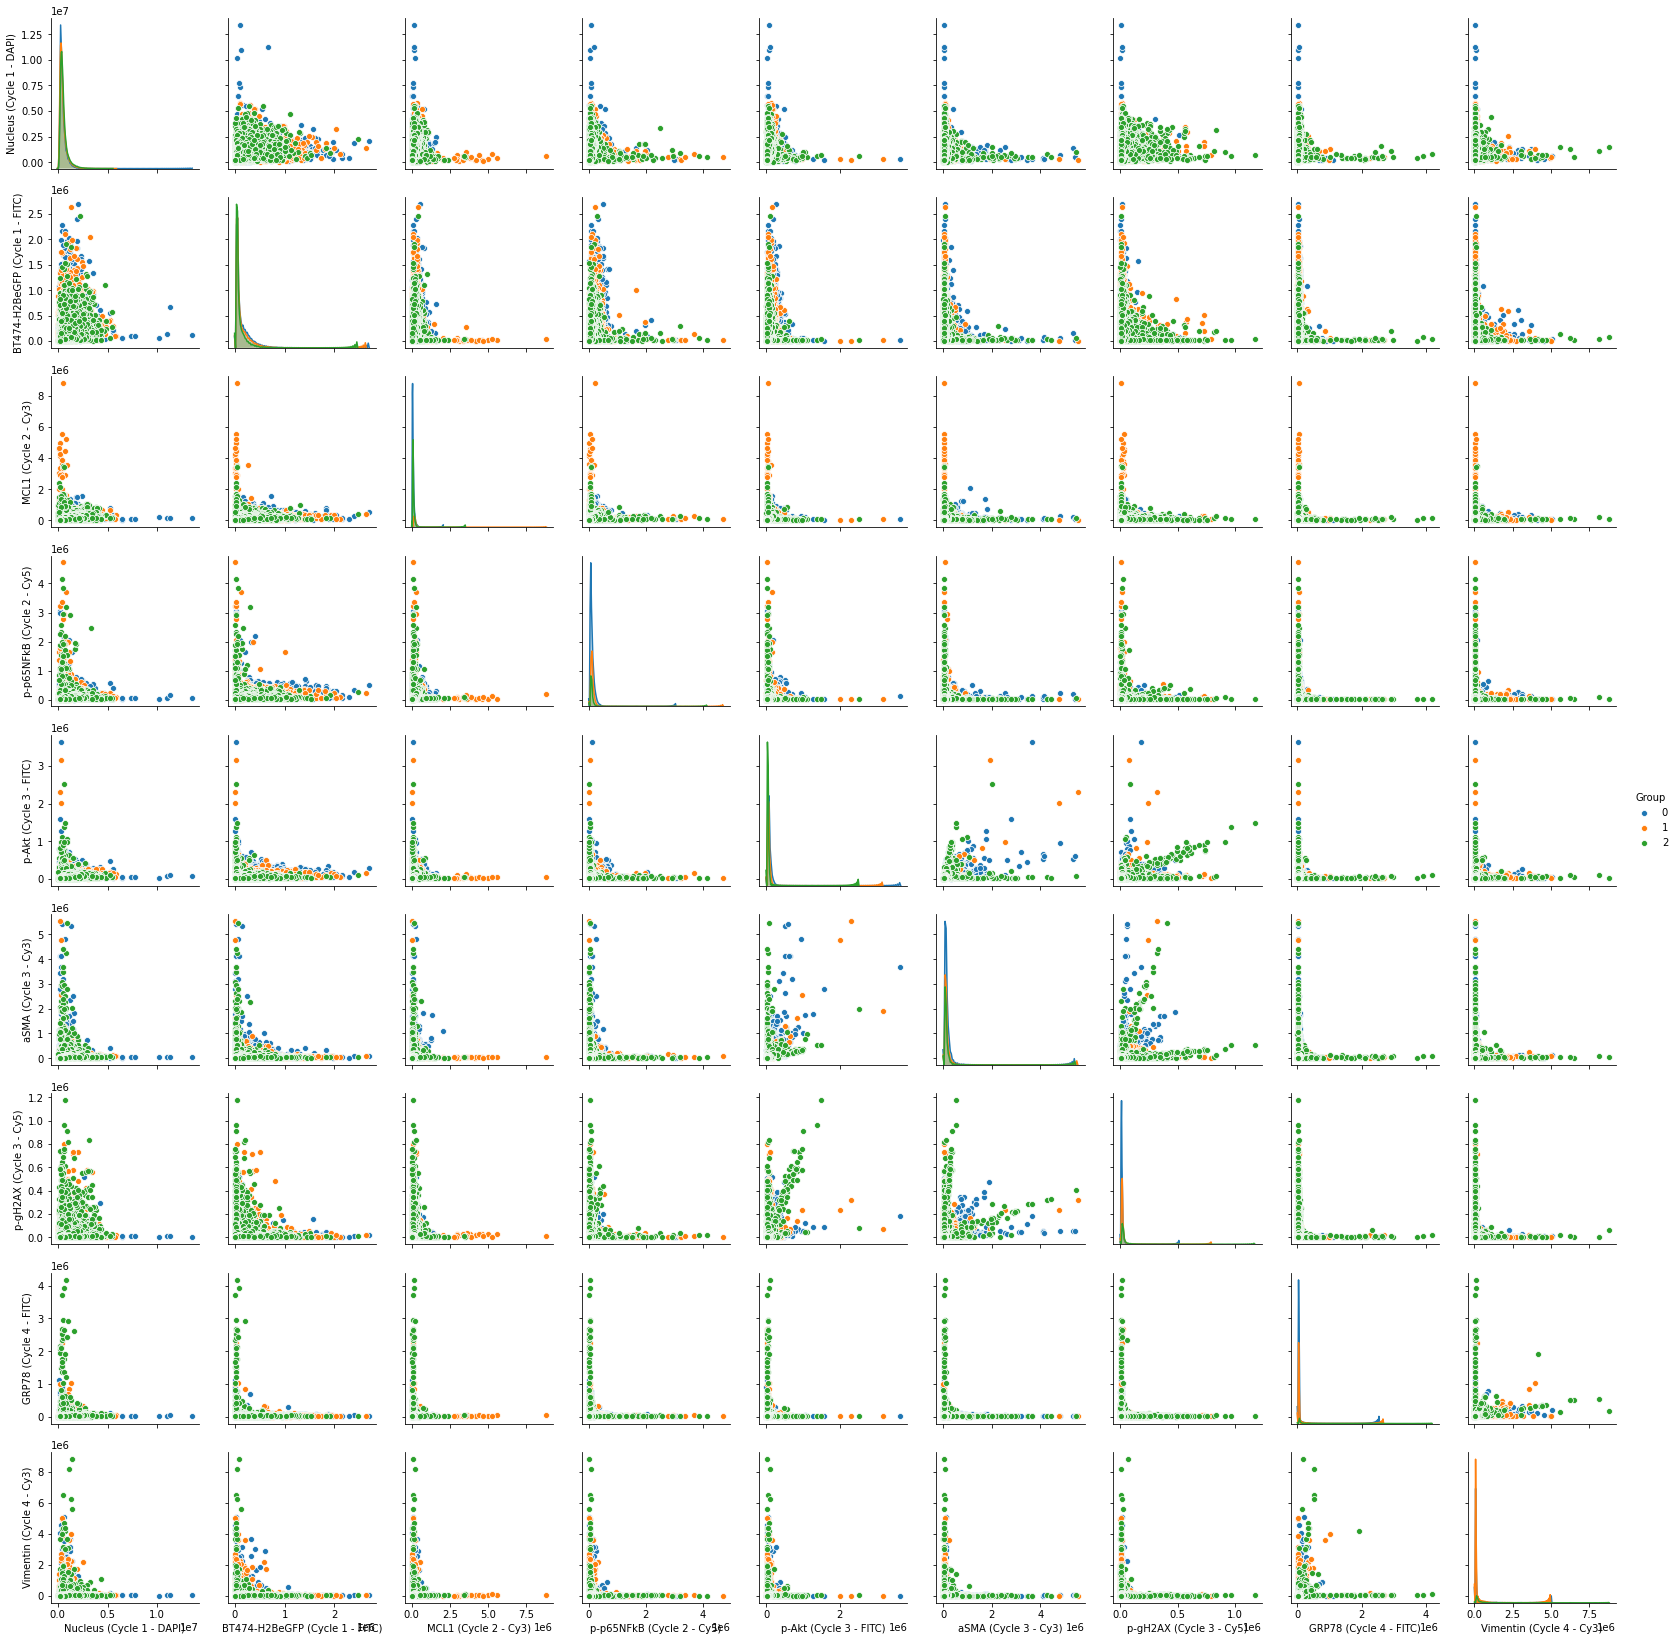

In [7]:
sns.pairplot(data=df_cyt, vars=df_cyt.columns[1:-1], hue='Group')
plt.show()